In [4]:
import json
import pandas as pd
import numpy as np  
import os 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
path = '/content/drive/MyDrive/DO_AN_KHDL/DATA'
path_audio_feats = os.path.join(path, 'audio_features.tsv')
path_playlists = os.path.join(path, 'playlists.tsv')
path_tracks = os.path.join(path, 'tracks.tsv')

In [6]:
pd_audio_feats = pd.read_csv(path_audio_feats, sep = '\t')
pd_tracks = pd.read_csv(path_tracks, sep = '\t')
pd_playlists = pd.read_csv(path_playlists, sep = '\t')
pd_playlists = pd_playlists.fillna('None')

In [7]:
pd_tracks = pd.merge(pd_tracks, pd_audio_feats, left_on = 'track_id', right_on = 'id')
pd_full = pd.merge(pd_tracks, pd_playlists, left_on = 'playlist_id', right_on = 'playlist_id')

pd_tracks = pd_tracks.drop('id', 1)
pd_full = pd_full.drop('playlist_name_y', 1)
pd_full = pd_full.drop('id', 1)

In [8]:
pd_tracks

,track_id,track_name,playlist_id,playlist_name,artist_ids,artist_names,album_id,album_name,track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature
0,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4
1,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DWUa8ZRTfalHk,Pop Rising,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4
2,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DX3rxVfibe1L0,Mood Booster,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4
3,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DWU13kKnk03AP,Daily Lift,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4
4,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DX1N5uK98ms5p,Teen Party,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,3Zuf70897YkrVRAsrBMMSF,"You're The One That I Want - From ""Grease"" Ori...",0RTz1jFo5BXGPfI8eVf8sj,Top Shower Songs,"['4hKkEHkaqCsyxNxXEsszVH', '4BoRxUdrcgbbq1rxJv...","['John Travolta', 'Olivia Newton-John']",0CbwlsDekgmAW03uMBjPBG,Grease (Deluxe Edition),168466,0.751,0.753,0,-8.198,1,0.0935,0.22700,0.000784,0.2090,0.774,106.976,https://api.spotify.com/v1/audio-analysis/3Zuf...,4
86396,4Y4Gd3ty8uut6Qw43c7yJc,(Sittin' On) the Dock of the Bay,4lgseztVwmKQ8MNETPVIny,foodora dinner playlist,['60df5JBRRPcnSpsIMxxwQm'],['Otis Redding'],0kSkzG0sfuG4lRuFF5jWVr,The Dock of the Bay,166826,0.486,0.312,2,-13.522,1,0.0533,0.72600,0.000002,0.0601,0.598,205.917,https://api.spotify.com/v1/audio-analysis/4Y4G...,4
86397,1MDoll6jK4rrk2BcFRP5i7,Hello,4lgseztVwmKQ8MNETPVIny,foodora dinner playlist,['4dpARuHxo51G3z768sgnrY'],['Adele'],5y28RdPzIRXegzr5YM9Y0D,Hello,295502,0.471,0.431,5,-6.129,0,0.0342,0.32900,0.000000,0.0854,0.289,157.980,https://api.spotify.com/v1/audio-analysis/1MDo...,4
86398,0ygTmpa6uSotkBkTiwcMZ4,Warwick Avenue,4lgseztVwmKQ8MNETPVIny,foodora dinner playlist,['37NqXwtb6nIEqRt4EJSoIO'],['Duffy'],4x0HJqUUDRvJLZbie95Ayk,Rockferry (Deluxe Edition),226386,0.493,0.590,0,-5.814,0,0.0392,0.33900,0.000000,0.1210,0.502,169.908,https://api.spotify.com/v1/audio-analysis/0ygT...,4


In [9]:
pd_full.shape

(86400, 25)

In [10]:
pd_full.head(5)

,track_id,track_name,playlist_id,playlist_name_x,artist_ids,artist_names,album_id,album_name,track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature,description,num_tracks,num_followers
0,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.00000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
1,7igeByaBM0MgGsgXtNxDJ7,positions,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['66CXWjxzNUsdJxJ2JdwvnR'],['Ariana Grande'],3jqEvfiu2ENgmgzZq27zbi,positions,172324,0.736,0.802,0,-4.759,1,0.0864,0.46800,0.00000,0.0940,0.675,144.005,https://api.spotify.com/v1/audio-analysis/7ige...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
2,0lx2cLdOt3piJbcaXIV74f,willow,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['06HL4z0CvFAxyc27GXpf02'],['Taylor Swift'],2Xoteh7uEpea4TohMxjtaq,evermore,214706,0.392,0.574,7,-9.195,1,0.1700,0.83300,0.00179,0.1450,0.529,81.112,https://api.spotify.com/v1/audio-analysis/0lx2...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
3,2Z8yfpFX0ZMavHkcIeHiO1,Monster (Shawn Mendes & Justin Bieber),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['7n2wHs1TKAczGzO7Dd2rGr', '1uNFoZAHBGtllmzznp...","['Shawn Mendes', 'Justin Bieber']",3yVVL2EYLp8g7gT08VvYKy,Monster,178994,0.652,0.383,2,-7.076,0,0.0516,0.06760,0.00000,0.0828,0.549,145.765,https://api.spotify.com/v1/audio-analysis/2Z8y...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
4,6zFMeegAMYQo0mt8rXtrli,HOLIDAY,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['7jVv8c5Fj3E9VhNjxT4snq'],['Lil Nas X'],4EvukZrmNBiqJbs3LwOSHu,HOLIDAY,154997,0.810,0.511,5,-6.924,0,0.1640,0.12000,0.00000,0.0832,0.837,151.947,https://api.spotify.com/v1/audio-analysis/6zFM...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233


## 1. Kiểm tra thông tin DataFrame thu thập được.

In [11]:
pd_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86400 entries, 0 to 86399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           86400 non-null  object 
 1   track_name         86395 non-null  object 
 2   playlist_id        86400 non-null  object 
 3   playlist_name_x    86400 non-null  object 
 4   artist_ids         86400 non-null  object 
 5   artist_names       86400 non-null  object 
 6   album_id           86400 non-null  object 
 7   album_name         86395 non-null  object 
 8   track_duration_ms  86400 non-null  int64  
 9   danceability       86400 non-null  float64
 10  energy             86400 non-null  float64
 11  key                86400 non-null  int64  
 12  loudness           86400 non-null  float64
 13  mode               86400 non-null  int64  
 14  speechiness        86400 non-null  float64
 15  acousticness       86400 non-null  float64
 16  instrumentalness   864

In [12]:
# Kiểm tra giá trị rỗng.
total = pd_full.isnull().sum().sort_values(ascending=False)
percent = (pd_full.isnull().sum()/pd_full.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
track_name,5,0.000058
album_name,5,0.000058
num_followers,0,0.000000
key,0,0.000000
playlist_id,0,0.000000
playlist_name_x,0,0.000000
artist_ids,0,0.000000
artist_names,0,0.000000
album_id,0,0.000000
track_duration_ms,0,0.000000


In [13]:
#Thông tin rỗng là discription, ta có thể chỉ điền vào "None"
pd_full = pd_full.fillna('None')

In [14]:
#Kiểm tra và bỏ giá trị trùng lặp
pd_full = pd_full.drop_duplicates()

In [15]:
pd_full.head()

,track_id,track_name,playlist_id,playlist_name_x,artist_ids,artist_names,album_id,album_name,track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature,description,num_tracks,num_followers
0,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.00000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463C...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
1,7igeByaBM0MgGsgXtNxDJ7,positions,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['66CXWjxzNUsdJxJ2JdwvnR'],['Ariana Grande'],3jqEvfiu2ENgmgzZq27zbi,positions,172324,0.736,0.802,0,-4.759,1,0.0864,0.46800,0.00000,0.0940,0.675,144.005,https://api.spotify.com/v1/audio-analysis/7ige...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
2,0lx2cLdOt3piJbcaXIV74f,willow,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['06HL4z0CvFAxyc27GXpf02'],['Taylor Swift'],2Xoteh7uEpea4TohMxjtaq,evermore,214706,0.392,0.574,7,-9.195,1,0.1700,0.83300,0.00179,0.1450,0.529,81.112,https://api.spotify.com/v1/audio-analysis/0lx2...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
3,2Z8yfpFX0ZMavHkcIeHiO1,Monster (Shawn Mendes & Justin Bieber),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['7n2wHs1TKAczGzO7Dd2rGr', '1uNFoZAHBGtllmzznp...","['Shawn Mendes', 'Justin Bieber']",3yVVL2EYLp8g7gT08VvYKy,Monster,178994,0.652,0.383,2,-7.076,0,0.0516,0.06760,0.00000,0.0828,0.549,145.765,https://api.spotify.com/v1/audio-analysis/2Z8y...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
4,6zFMeegAMYQo0mt8rXtrli,HOLIDAY,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['7jVv8c5Fj3E9VhNjxT4snq'],['Lil Nas X'],4EvukZrmNBiqJbs3LwOSHu,HOLIDAY,154997,0.810,0.511,5,-6.924,0,0.1640,0.12000,0.00000,0.0832,0.837,151.947,https://api.spotify.com/v1/audio-analysis/6zFM...,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233


## 2. Phân tích và khám phá dữ liệu (EDA)

### Nhóm câu hỏi 1: Liên quan đến playlist.

#### Câu hỏi 1: Số lượng bài hát thu thập được trong mỗi playlist có đều không?

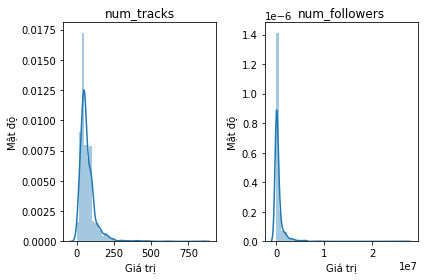

In [16]:
fig, ax = plt.subplots(1, 2)
sns.distplot(pd_playlists['num_tracks'].values, ax = ax[0])
sns.distplot(pd_playlists['num_followers'].values, ax = ax[1])

ax[0].set_title('num_tracks')
ax[1].set_title('num_followers')

ax[0].set_ylabel('Mật độ')
ax[0].set_xlabel('Giá trị')
ax[1].set_ylabel('Mật độ')
ax[1].set_xlabel('Giá trị')

fig.tight_layout()

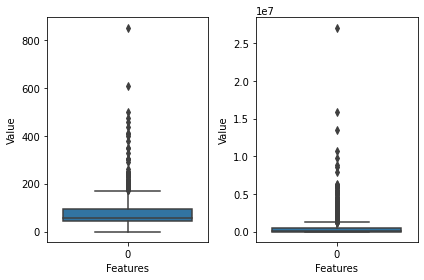

In [33]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(data=pd_playlists['num_tracks'], ax = ax[0])
sns.boxplot(data=pd_playlists['num_followers'], ax = ax[1])

for i in range(2):
  ax[i].set_ylabel('Value')
  ax[i].set_xlabel('Features')

fig.tight_layout()

**Nhận xét**: 

#### Câu hỏi 2: Hãy liệt kê các tên playlist có số lượng người theo dõi nhiều nhất (thông tin này sẽ có lợi cho quá trình đề xuất bài hát).

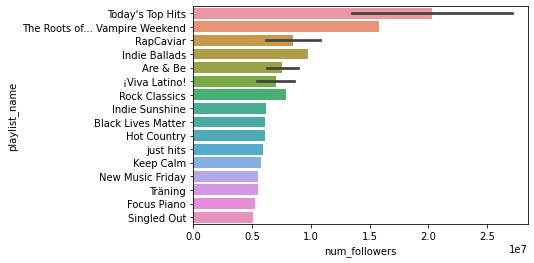

In [17]:
temp_pd = pd_playlists.sort_values(by=['num_followers'], ascending=False)
top_num = 20
sns.barplot(x="num_followers", y="playlist_name", data=temp_pd[:top_num])

**Nhận xét**: 

#### Câu hỏi 3: Hãy liệt kê các tên playlist có số lượng tracks nhiều nhất.

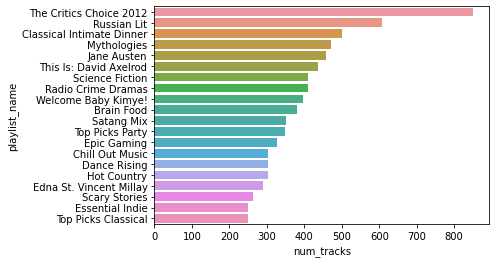

In [18]:
temp_pd = pd_playlists.sort_values(by=['num_tracks'], ascending=False)
top_num = 20
sns.barplot(x="num_tracks", y="playlist_name", data=temp_pd[:top_num])

**Nhận xét**: 'Not care about them'.

### Nhóm câu hỏi 2: Liên quan đến tác giả bài hát (artist) và album (album)

#### Câu hỏi 1: Hãy liệt kê các tên tác giả (artist) và album có số lượng tracks nhiều nhất. 

In [19]:
temp_df = pd_full[['artist_names']]
temp_df['artist_names'] = temp_df['artist_names'].apply(lambda x : x[1:-1].split(','))
temp_df = temp_df.explode('artist_names')

top_num = 20
temp_df = temp_df['artist_names'].value_counts()[:top_num]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


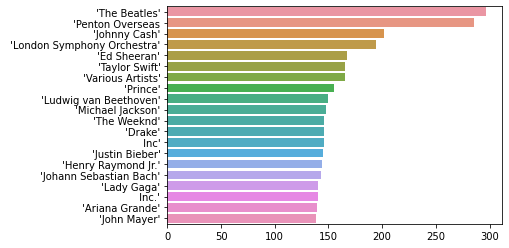

In [20]:
sns.barplot(x = temp_df.values, y= temp_df.index)

**Nhận xét**: 

In [21]:
temp_df = pd_full[['album_name']]

top_num = 20
temp_df = temp_df['album_name'].value_counts()[:top_num]

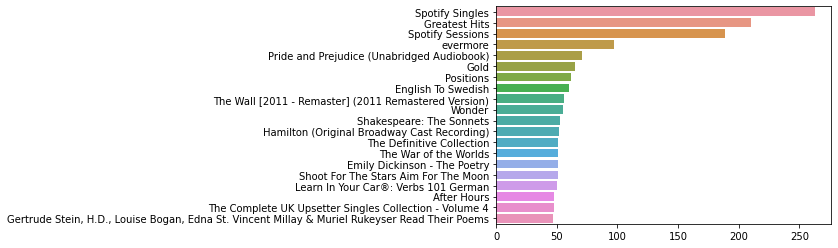

In [22]:
sns.barplot(x = temp_df.values, y= temp_df.index)

**Nhận xét**:

### Nhóm câu hỏi 3: Liên quan đến các thuộc tính của mỗi bài hát.

Mỗi bài hát có các loại thuộc tính gì, liệt kê ra.

#### Câu hỏi 1: Thời lượng của các bài hát được phân bố như thế nào?

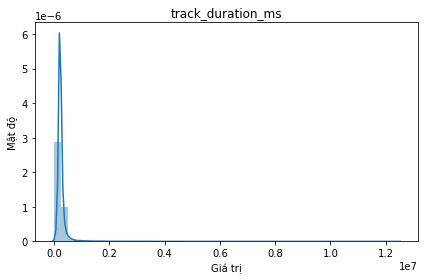

In [23]:
fig, ax = plt.subplots()

sns.distplot(pd_full['track_duration_ms'].values, ax = ax)

ax.set_title('track_duration_ms')

ax.set_ylabel('Mật độ')
ax.set_xlabel('Giá trị')

fig.tight_layout()

**Nhận xét**:

#### Câu hỏi 2: Các thuộc tính liên quan đến tâm trạng bài hát (Danceability, Valence, Energy, Tempo) được phân bố như thế nào?

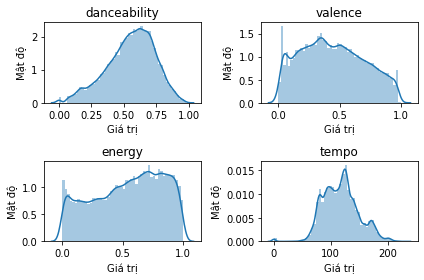

In [24]:
fig, ax = plt.subplots(2, 2)

sns.distplot(pd_full['danceability'].values, ax = ax[0][0])
sns.distplot(pd_full['valence'].values, ax = ax[0][1])
sns.distplot(pd_full['energy'].values, ax = ax[1][0])
sns.distplot(pd_full['tempo'].values, ax = ax[1][1])

ax[0][0].set_title('danceability')
ax[0][1].set_title('valence')
ax[1][0].set_title('energy')
ax[1][1].set_title('tempo')

for i in range(2):
  for j in range(2):
    ax[i][j].set_ylabel('Mật độ')
    ax[i][j].set_xlabel('Giá trị')

fig.tight_layout()

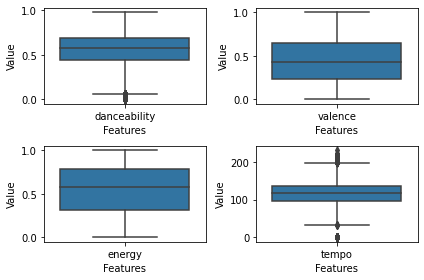

In [27]:
fig, ax = plt.subplots(2, 2)

sns.boxplot(data=pd_full[['danceability']], ax = ax[0][0])
sns.boxplot(data=pd_full[['valence']], ax = ax[0][1])
sns.boxplot(data=pd_full[['energy']], ax = ax[1][0])
sns.boxplot(data=pd_full[['tempo']], ax = ax[1][1])

for i in range(2):
  for j in range(2):
    ax[i][j].set_ylabel('Value')
    ax[i][j].set_xlabel('Features')

fig.tight_layout()

**Nhận xét**:

#### Câu hỏi 3: Các thuộc tính liên quan đến đặc điểm bài hát (Loudness, Speechiness, Instrumentalness) được phân bố như thế nào?

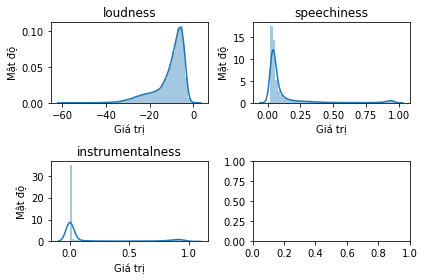

In [ ]:
fig, ax = plt.subplots(2, 2)

sns.distplot(pd_full['loudness'].values, ax = ax[0][0])
sns.distplot(pd_full['speechiness'].values, ax = ax[0][1])
sns.distplot(pd_full['instrumentalness'].values, ax = ax[1][0])

ax[0][0].set_title('loudness')
ax[0][1].set_title('speechiness')
ax[1][0].set_title('instrumentalness')

for i in range(2):
  for j in range(2):
    if (i != 1 or j != 1):
      ax[i][j].set_ylabel('Mật độ')
      ax[i][j].set_xlabel('Giá trị')

fig.tight_layout()

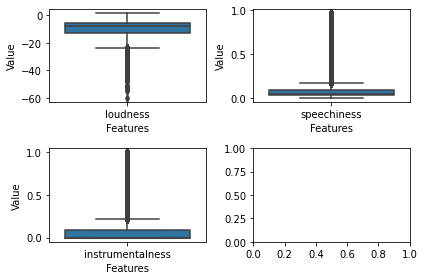

In [31]:
fig, ax = plt.subplots(2, 2)

sns.boxplot(data=pd_full[['loudness']], ax = ax[0][0])
sns.boxplot(data=pd_full[['speechiness']], ax = ax[0][1])
sns.boxplot(data=pd_full[['instrumentalness']], ax = ax[1][0])

for i in range(2):
  for j in range(2):
    if (i != 1 or j != 1):
      ax[i][j].set_ylabel('Value')
      ax[i][j].set_xlabel('Features')

fig.tight_layout()

#### Câu hỏi 4: Các thuộc tính liên quan đến nội dung bài hát (Liveness, Acousticness) được phân bố như thế nào?

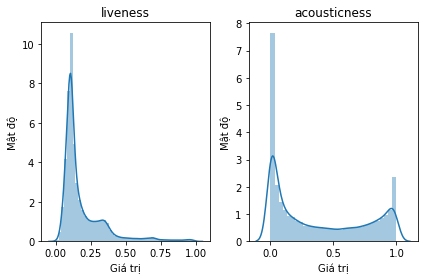

In [ ]:
fig, ax = plt.subplots(1, 2)

sns.distplot(pd_full['liveness'].values, ax = ax[0])
sns.distplot(pd_full['acousticness'].values, ax = ax[1])

ax[0].set_title('liveness')
ax[1].set_title('acousticness')

for i in range(2):
    ax[i].set_ylabel('Mật độ')
    ax[i].set_xlabel('Giá trị')

fig.tight_layout()

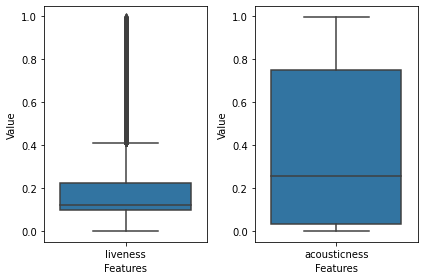

In [32]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(data=pd_full[['liveness']], ax = ax[0])
sns.boxplot(data=pd_full[['acousticness']], ax = ax[1])

for i in range(2):
  ax[i].set_ylabel('Value')
  ax[i].set_xlabel('Features')

fig.tight_layout()

**Nhận xét**:

#### Câu hỏi 5: Tương quan giữa các thuộc tính trên (Danceability, Valence, Energy, Tempo, Loudness, Speechiness, Instrumentalness, Liveness, Acousticness, Duration) là như thế nào?

In [ ]:
temp_df = pd_full[['track_duration_ms', 'liveness', 'acousticness', 'loudness', 'speechiness', 'instrumentalness', 'danceability', 'valence', 'energy', 'tempo']]

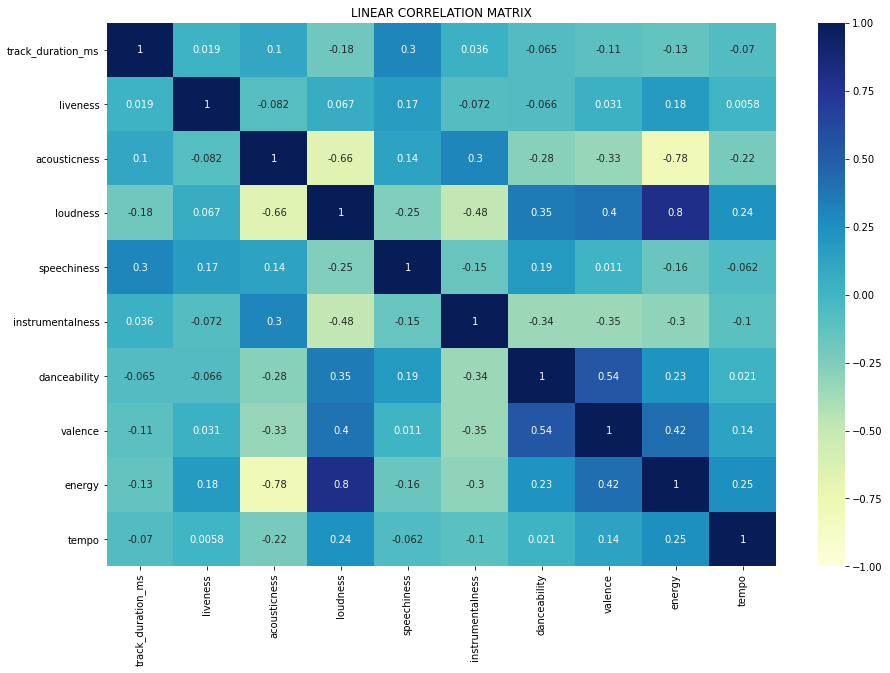

In [ ]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(temp_df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

**Nhận xét**: